# House Prices Advanced Regression Models

In [74]:
# libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import (
    StandardScaler,
    OneHotEncoder,
    OrdinalEncoder
)
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns



In [4]:
data =  pd.read_csv("../dataset/adv_house.csv")
data.sample(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
113,114,20,RL,NaN,21000,Pave,NaN,Reg,Bnk,AllPub,...,0,NaN,MnPrv,NaN,0,10,2007,COD,Abnorml,217000
241,242,30,RM,40.0,3880,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,110500
941,942,60,RL,NaN,8755,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,6,2009,WD,Normal,214000
963,964,20,RL,122.0,11923,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,239000
1319,1320,20,RL,75.0,10215,Pave,NaN,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,111000
73,74,20,RL,85.0,10200,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,5,2010,WD,Normal,144900
1150,1151,20,RL,57.0,8280,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,11,2007,WD,Normal,124000
1210,1211,60,RL,70.0,11218,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,400,5,2010,WD,Normal,189000
433,434,60,RL,100.0,10839,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,181000
810,811,20,RL,78.0,10140,Pave,NaN,Reg,Lvl,AllPub,...,648,Fa,GdPrv,NaN,0,1,2006,WD,Normal,181000


## Exploratory Data Analysis

In [5]:
data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [6]:
data.shape

(1460, 81)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [9]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


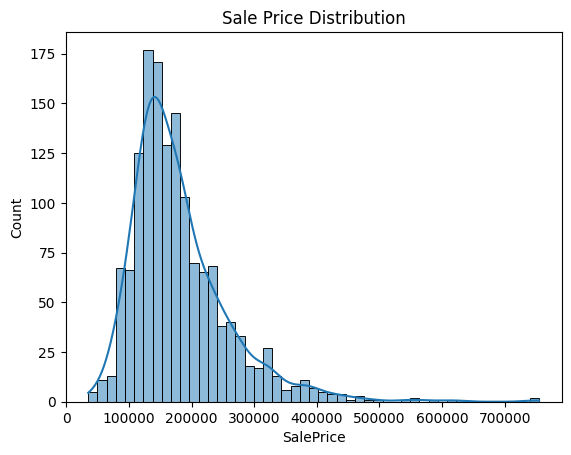

In [10]:
# sale price
sns.histplot(data["SalePrice"], kde=True)
plt.title("Sale Price Distribution")
plt.show()

In [12]:
# missing values
missing = data.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
pd.DataFrame(
    {"Count": missing, "Percent": (missing/len(data))*100}
)

,Count,Percent
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
MasVnrType,872,59.726027
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageFinish,81,5.547945


In [14]:
# categoricals
categoricals =  data.select_dtypes(include=["object"]).columns
for col in categoricals[:5]:
    print(data[col].value_counts().head())
    print()

MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64

Street
Pave    1454
Grvl       6
Name: count, dtype: int64

Alley
Grvl    50
Pave    41
Name: count, dtype: int64

LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: count, dtype: int64

LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: count, dtype: int64



In [16]:
# correlation
numeric = data.select_dtypes(include=["int64", "float64"]).columns
corr = data[numeric].corr()["SalePrice"].sort_values(ascending=False)
corr.head(15)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
Name: SalePrice, dtype: float64

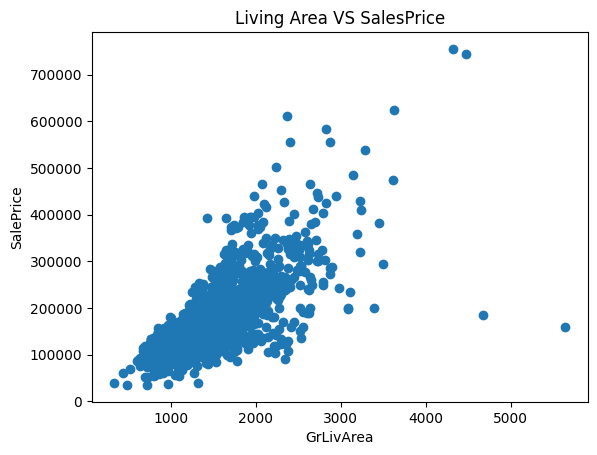

In [17]:
# outliers check using a scatter plot
plt.scatter(
    data["GrLivArea"],
    data["SalePrice"]
)
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.title("Living Area VS SalesPrice")
plt.show()

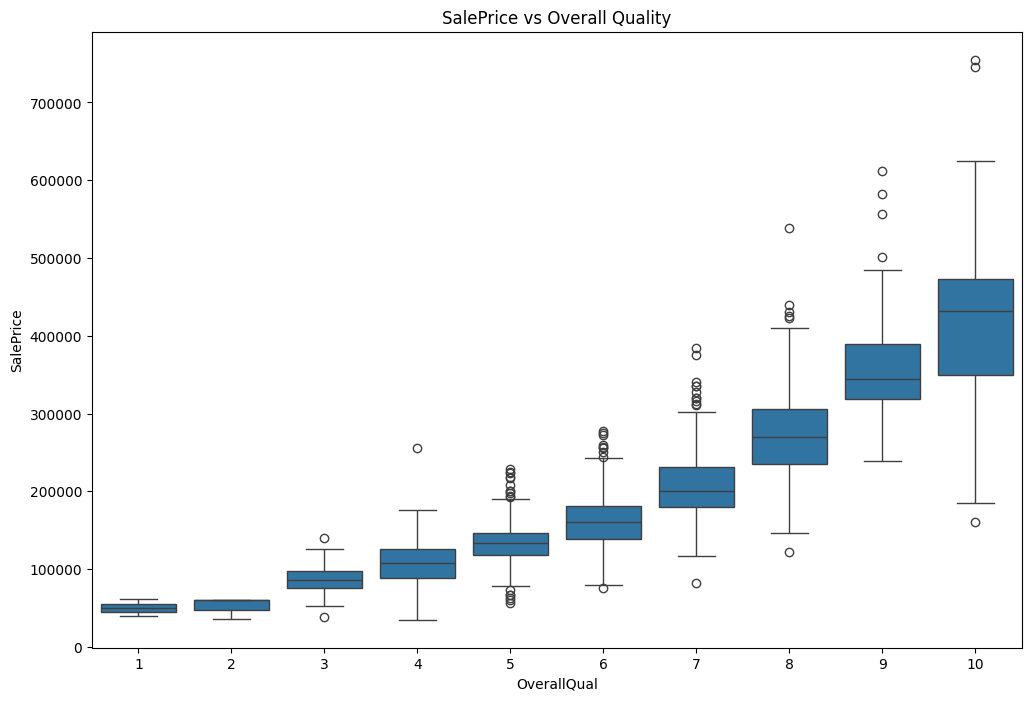

In [18]:
# boxplots for saleprice vs overall quality
plt.figure(figsize=(12, 8))
sns.boxplot(x="OverallQual", y='SalePrice', data=data)
plt.title("SalePrice vs Overall Quality")
plt.show()

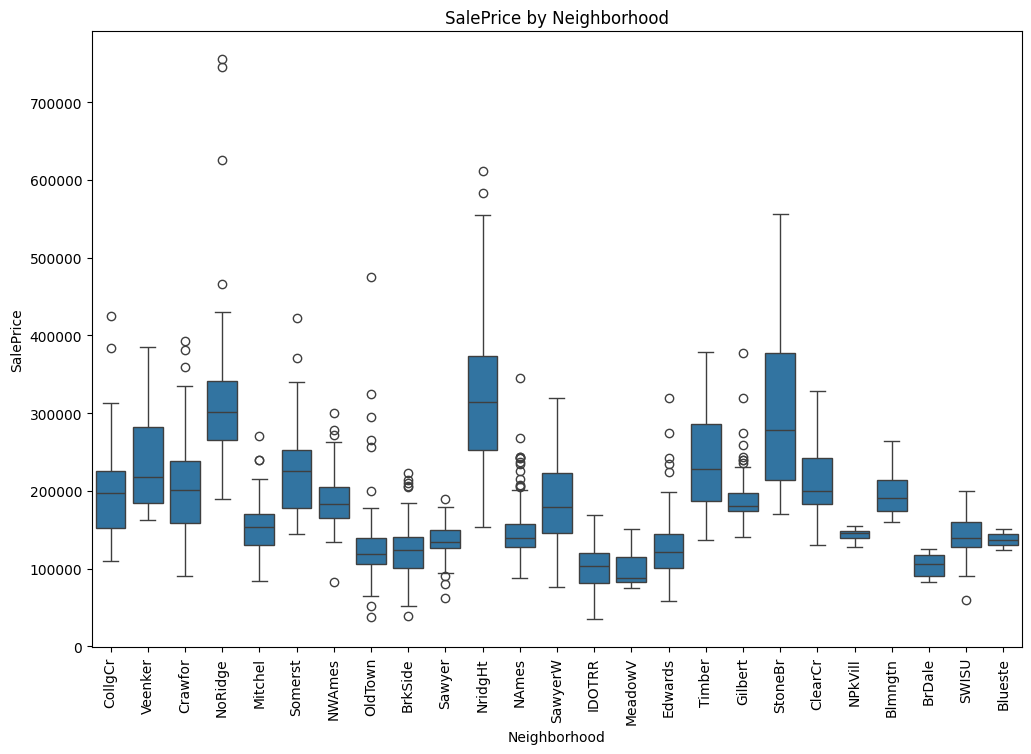

In [19]:
# boxplot for saleprice by neighborhood
plt.figure(figsize=(12,8))
sns.boxplot(x="Neighborhood", y="SalePrice", data=data)
plt.xticks(rotation=90)
plt.title("SalePrice by Neighborhood")
plt.show()

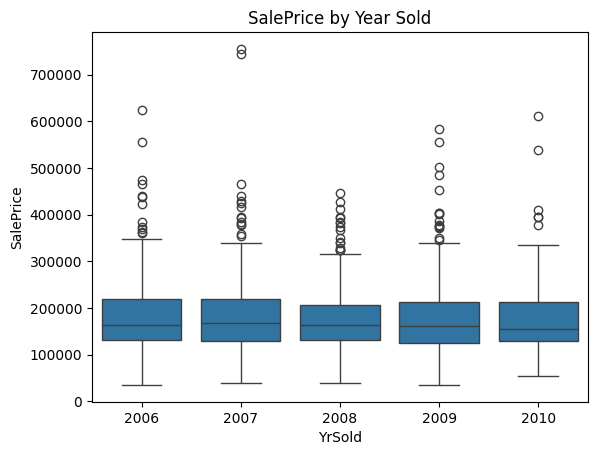

In [20]:
# saleprice by year sold
sns.boxplot(x="YrSold", y="SalePrice", data=data)
plt.title("SalePrice by Year Sold")
plt.show()

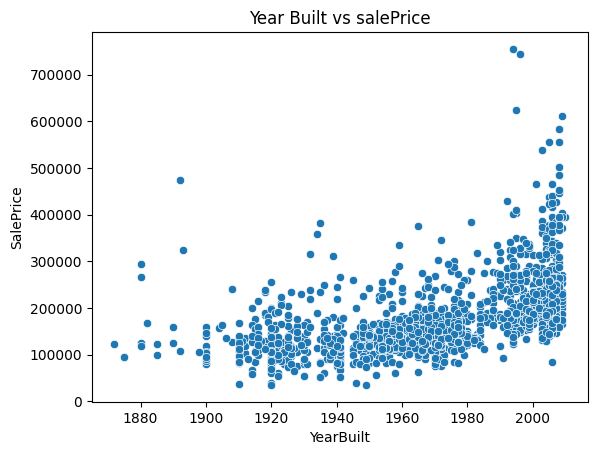

In [22]:
# year built vs saleprice
sns.scatterplot(x="YearBuilt", y="SalePrice", data=data)
plt.title("Year Built vs salePrice")
plt.show()

### Findings

Strong numeric predictors: OverallQual, GrLivArea, GarageCars, TotalBsmtSF.

Key categoricals: Neighborhood, KitchenQual, OverallQual.

Outliers: A few huge GrLivArea homes with very low price.

Missingness: Alley, PoolQC, Fence, FireplaceQu.

## Data Preprocessing

In [24]:
data.sample(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
23,24,120,RM,44.0,4224,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,129900
981,982,60,RL,98.0,12203,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,336000
1121,1122,20,RL,84.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,New,Partial,212900
496,497,20,RL,NaN,12692,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,430000
343,344,120,RL,63.0,8849,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,266000
528,529,30,RL,58.0,9098,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2007,WD,Normal,86000
643,644,60,RL,80.0,10793,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,4,2007,WD,Normal,152000
1122,1123,20,RL,NaN,8926,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,10,2009,COD,Abnorml,112000
35,36,60,RL,108.0,13418,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Normal,309000
355,356,20,RL,105.0,11249,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,177500


In [26]:
# dropping the id column
data = data.drop("Id", axis=1)
data.sample(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
538,20,RL,NaN,11553,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,158000
1141,60,RL,NaN,10304,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,NaN,NaN,NaN,0,10,2009,WD,Normal,197500
1032,60,RL,NaN,14541,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,11,2006,WD,Abnorml,310000
533,20,RL,50.0,5000,Pave,NaN,Reg,Low,AllPub,Inside,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,39300
1169,60,RL,118.0,35760,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,625000
771,20,RL,67.0,8877,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2006,COD,Normal,102000
587,85,RL,74.0,8740,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,137000
270,60,FV,84.0,10728,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2006,New,Partial,266000
856,80,RL,NaN,10970,Pave,NaN,IR1,Low,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,10,2008,WD,Normal,147000
137,90,RL,82.0,11070,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2006,WD,Family,171000


In [27]:
# features and labels separation
X, y = data.drop("SalePrice", axis=1), data["SalePrice"]
X.sample(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1372,60,RL,75.0,9750,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1223,20,RL,89.0,10680,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,10,2006,WD,Normal
1280,20,RL,67.0,9808,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,3,2009,WD,Normal
450,30,RM,70.0,5684,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1034,30,RL,50.0,6305,Pave,NaN,Reg,Bnk,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,6,2007,WD,Normal
83,20,RL,80.0,8892,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,7,2007,COD,Normal
258,60,RL,80.0,12435,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,5,2008,WD,Normal
827,20,RL,65.0,8529,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2009,WD,Normal
1408,70,RM,60.0,7740,Pave,NaN,Reg,Lvl,AllPub,Inside,...,168,0,NaN,NaN,NaN,0,6,2010,WD,Normal
556,20,RL,69.0,14850,Pave,NaN,IR1,Lvl,AllPub,Inside,...,122,0,NaN,MnWw,NaN,0,5,2006,WD,Normal


In [28]:
y.sample(10)

575     118500
1168    235000
532     107500
1325     55000
362     198500
1056    185850
1025    112500
621     240000
666     129000
879     136500
Name: SalePrice, dtype: int64

In [31]:
# splitting the data before preprocessing to avoid data leakage
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y,
    test_size=0.2,
    random_state=21
)
print(X.shape, X_train.shape, X_valid.shape)

(1460, 79) (1168, 79) (292, 79)


In [33]:
# column grouping
numeric_features = X.select_dtypes(
    include=["int64", "float64"]
).columns.tolist()

categorical_features = X.select_dtypes(
    include=["object"]
).columns.tolist()

# year features
year_features = ["YearBuilt", "YearRemodAdd", "GarageYrBlt", "YrSold", "MoSold"]

#adjust lists
numeric_features = [
    col for col in numeric_features if col not in year_features
]

In [37]:
numeric_features

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal']

In [38]:
categorical_features

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [39]:
year_features

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold', 'MoSold']

### Preprocessing actions
Numeric features → median imputation + scaling.

Categorical features → impute missing as "Missing" + OneHot.

Ordinal quality features (like ExterQual, KitchenQual) → map to ordered integers.

In [53]:
# ordinal encoding: some categorical variables has an inherent order
ordinal_features = [
    "ExterQual",
    "ExterCond",
    "BsmtQual",
    "BsmtCond",
    "HeatingQC",
    "KitchenQual",
    "FireplaceQu",
    "GarageQual",
    "GarageCond"
]

# Define the correct order from worst → best
quality_order = ["Po", "Fa", "TA", "Gd", "Ex"]

# Pipeline for ordinal features
ordinal_encoder = Pipeline(
    steps=[
        #fill missing values with "Po" 
        ("imputer", SimpleImputer(strategy="constant", fill_value="Po")),

        # map categories to numbers in the correct order
        ("ordinal", OrdinalEncoder(
            categories=[quality_order] * len(ordinal_features),
            handle_unknown='use_encoded_value',
            unknown_value=-1
        ))
    ]
)


In [54]:
# numeric pipeline
numeric_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("onehot", OneHotEncoder(handle_unknown="ignore"))
    ]
)

In [55]:
# categorical pipeline
categorical_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("onehot", OneHotEncoder(handle_unknown="ignore"))
    ]
)

In [56]:
# year features
year_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent"))
    ]
)

In [57]:
# columntransform assembly: joining everything
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
        ("year", year_transformer, year_features),
        ("ord", ordinal_encoder, ordinal_features)
    ]
)

In [58]:
# rigde model to just test the pipeline
model = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("regressor", Ridge())
    ]
)

In [59]:
# fitting
model.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [60]:

print("Train R^2:", model.score(X_train, y_train))
print("Valid R^2:", model.score(X_valid, y_valid))

Train R^2: 0.9987343215617981
Valid R^2: 0.8346022758737692


## Feature Engineering

In [61]:
# copy of traing data, just incase
X_train_fe = X_train.copy()
X_valid_fe = X_valid.copy()

In [62]:
# total living area
X_train_fe["TotalSF"] = X_train_fe["GrLivArea"] + X_train_fe["TotalBsmtSF"] + X_train_fe["1stFlrSF"] + X_train_fe["2ndFlrSF"]
X_valid_fe["TotalSF"] = X_valid_fe["GrLivArea"] + X_valid_fe["TotalBsmtSF"] + X_valid_fe["1stFlrSF"] + X_valid_fe["2ndFlrSF"]

In [63]:
# total bathrooms
X_train_fe['TotalBathrooms'] = (X_train_fe['FullBath'] + 0.5 * X_train_fe['HalfBath'] + X_train_fe['BsmtFullBath'] + 0.5 * X_train_fe['BsmtHalfBath'])
X_valid_fe['TotalBathrooms'] = (X_valid_fe['FullBath'] + 0.5 * X_valid_fe['HalfBath'] + X_valid_fe['BsmtFullBath'] + 0.5 * X_valid_fe['BsmtHalfBath'])


In [64]:
# house age and remodel
X_train_fe['HouseAge'] = X_train_fe['YrSold'] - X_train_fe['YearBuilt']
X_train_fe['RemodAge'] = X_train_fe['YrSold'] - X_train_fe['YearRemodAdd']
X_train_fe['IsRemodeled'] = (X_train_fe['YearRemodAdd'] != X_train_fe['YearBuilt']).astype(int)

X_valid_fe['HouseAge'] = X_valid_fe['YrSold'] - X_valid_fe['YearBuilt']
X_valid_fe['RemodAge'] = X_valid_fe['YrSold'] - X_valid_fe['YearRemodAdd']
X_valid_fe['IsRemodeled'] = (X_valid_fe['YearRemodAdd'] != X_valid_fe['YearBuilt']).astype(int)


In [65]:
# garage features
X_train_fe['GarageAge'] = X_train_fe['YrSold'] - X_train_fe['GarageYrBlt'].fillna(X_train_fe['YrSold'])
X_train_fe['HasGarage'] = (X_train_fe['GarageYrBlt'].notna()).astype(int)

X_valid_fe['GarageAge'] = X_valid_fe['YrSold'] - X_valid_fe['GarageYrBlt'].fillna(X_valid_fe['YrSold'])
X_valid_fe['HasGarage'] = (X_valid_fe['GarageYrBlt'].notna()).astype(int)


In [66]:
# amenities and binary indicators
X_train_fe['HasPool'] = (X_train_fe['PoolArea'] > 0).astype(int)
X_train_fe['HasFireplace'] = (X_train_fe['Fireplaces'] > 0).astype(int)
X_train_fe['HasBasement'] = (X_train_fe['TotalBsmtSF'] > 0).astype(int)

X_valid_fe['HasPool'] = (X_valid_fe['PoolArea'] > 0).astype(int)
X_valid_fe['HasFireplace'] = (X_valid_fe['Fireplaces'] > 0).astype(int)
X_valid_fe['HasBasement'] = (X_valid_fe['TotalBsmtSF'] > 0).astype(int)



In [67]:
# porch totals
X_train_fe['PorchTotal'] = (X_train_fe['OpenPorchSF'] + X_train_fe['3SsnPorch'] + X_train_fe['EnclosedPorch'] + X_train_fe['ScreenPorch'] + X_train_fe['WoodDeckSF'])
X_valid_fe['PorchTotal'] = (X_valid_fe['OpenPorchSF'] + X_valid_fe['3SsnPorch'] + X_valid_fe['EnclosedPorch'] + X_valid_fe['ScreenPorch'] + X_valid_fe['WoodDeckSF'])


In [68]:
# living area per room
X_train_fe['LivingAreaPerRoom'] = X_train_fe['GrLivArea'] / X_train_fe['TotRmsAbvGrd']
X_valid_fe['LivingAreaPerRoom'] = X_valid_fe['GrLivArea'] / X_valid_fe['TotRmsAbvGrd']

In [69]:
numeric_features

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal']

In [70]:
numeric_features_extended = numeric_features + [
    'TotalSF', 'TotalBathrooms', 'HouseAge', 'RemodAge', 'GarageAge',
    'PorchTotal', 'LivingAreaPerRoom', 'IsRemodeled', 'HasGarage', 
    'HasPool', 'HasFireplace', 'HasBasement'
]
numeric_features_extended

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'TotalSF',
 'TotalBathrooms',
 'HouseAge',
 'RemodAge',
 'GarageAge',
 'PorchTotal',
 'LivingAreaPerRoom',
 'IsRemodeled',
 'HasGarage',
 'HasPool',
 'HasFireplace',
 'HasBasement']

In [73]:
# columntransformer with extended numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features_extended),
        ("cat", categorical_transformer, categorical_features),
        ("year", year_transformer, year_features),
        ("ord", ordinal_encoder, ordinal_features)
    ]
)

In [75]:
# baseline model: Ridge Regressor
baseline_model = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("regresor", Ridge(alpha=1.0))
    ]
)

In [76]:
# fitting the base_line model
baseline_model.fit(X_train_fe, y_train)

,steps,"[('preprocessor', ...), ('regresor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [77]:
# making the predictions
y_pred = baseline_model.predict(X_valid_fe)

In [78]:
# model evaluation using rmse
mse = mean_squared_error(y_valid, y_pred)
rmse = np.sqrt(mse)
print(f"Baseline Ridge RMSE: {rmse:.2f}")

Baseline Ridge RMSE: 34360.26
